# Covariance

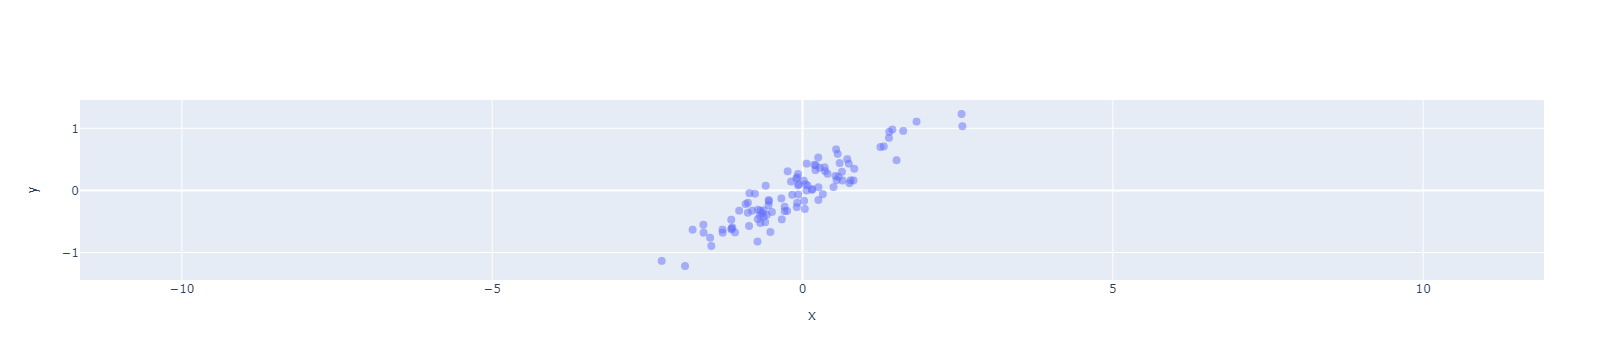

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 100 
x = np.random.normal(size=N)
y = 0.5*x + 0.2*(np.random.normal(size=N))

fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers', 
                marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y",
    yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

## Variance

In [3]:
print("Variance in x =",np.var(x))
print("Variance in y =",np.var(y))

Variance in x = 0.8177699742309891
Variance in y = 0.24598208640588257


## Covariance

In [4]:
def covariance(a,b):
    return ( (a - a.mean())*(b - b.mean()) ).sum() / (len(a)-1)

print("Covariance of x & y =",covariance(x,y))
print("Covariance of y & x =",covariance(x,y))
print("Covariance of x with itself =",covariance(x,x),", variance of x =",np.var(x))
print("Covariance of y with itself =",covariance(y,y),", variance of x =",np.var(y))

Covariance of x & y = 0.4148905820301282
Covariance of y & x = 0.4148905820301282
Covariance of x with itself = 0.8260302770009991 , variance of x = 0.8177699742309891
Covariance of y with itself = 0.24846675394533593 , variance of x = 0.24598208640588257


## Covariance Matrix

In [5]:
data = np.stack((x,y),axis=1)   # pack the x & y data together in one 2D array
print("data.shape =",data.shape)
cov = np.cov(data.T)   # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix =\n",cov)

data.shape = (100, 2)
covariance matrix =
 [[0.82603028 0.41489058]
 [0.41489058 0.24846675]]


# 3D example

data.shape = (100, 3)
covariance matrix =
 [[ 0.82603028  0.41489058 -0.39498773]
 [ 0.41489058  0.24846675 -0.20239973]
 [-0.39498773 -0.20239973  0.56370523]]


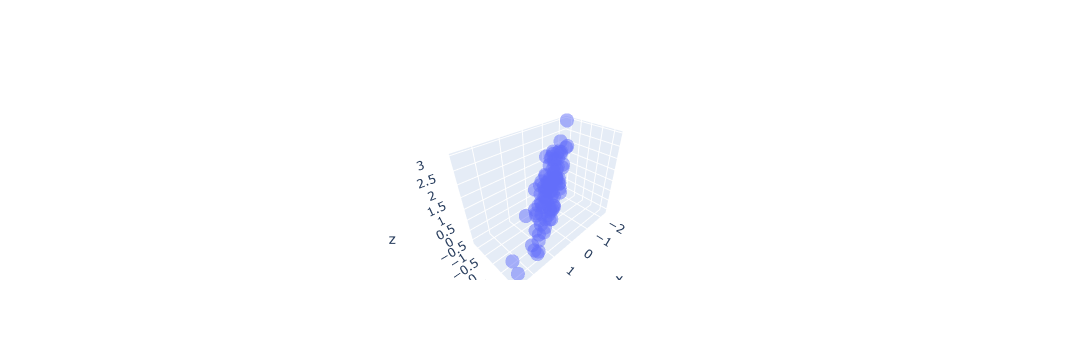

In [6]:
z = -.5*x + 2*np.random.uniform(size=N)
data = np.stack((x,y,z)).T
print("data.shape =",data.shape)
cov = np.cov(data.T)
print("covariance matrix =\n",cov)

# Plot our data
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers', marker=dict(size=8,opacity=0.5), name="data" )])
fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

# How to find the eigenvectors of a matrix

In [7]:
from numpy import linalg as LA
lambdas, vs = LA.eig(cov)
lambdas, vs

(array([1.30754934, 0.29893909, 0.03171383]),
 array([[-0.7618174 , -0.44896808, -0.466971  ],
        [-0.39635869, -0.24711929,  0.88421256],
        [ 0.51238076, -0.85869652, -0.01030737]]))

1. Find the eigenvalues

In [8]:
A = np.array([[-2,2,1],[-5,5,1],[-4,2,3]])

def sorted_eig(A):  # For now we sort 'by convention'. For PCA the sorting is key. 
    lambdas, vs = LA.eig(A)
    # Next line just sorts values & vectors together in order of decreasing eigenvalues
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  # un-doing the list-casting from the previous line

lambdas, vs = sorted_eig(A)
lambdas # hold off on printing out the eigenvectors until we do the next part!

(3.0000000000000053, 2.0000000000000027, 0.9999999999999907)

2. Use the eigenvalues to get the eigenvectors

In [9]:
print(" "*15,"Ours"," "*28,"Numpy")
print(np.array([1,2,1])/np.sqrt(6), vs[:,0])
print(np.array([1,1,2])/np.sqrt(6), vs[:,1])
print(np.array([1,1,1])/np.sqrt(3), vs[:,2])

                Ours                              Numpy
[0.40824829 0.81649658 0.40824829] [-0.40824829 -0.81649658 -0.40824829]
[0.40824829 0.40824829 0.81649658] [0.40824829 0.40824829 0.81649658]
[0.57735027 0.57735027 0.57735027] [0.57735027 0.57735027 0.57735027]


# 3D Eigenvectors

lambdas, vs =
 (1.3075493402627114, 0.29893909200416663, 0.031713825781378595) 
 [[-0.7618174  -0.44896808 -0.466971  ]
 [-0.39635869 -0.24711929  0.88421256]
 [ 0.51238076 -0.85869652 -0.01030737]]


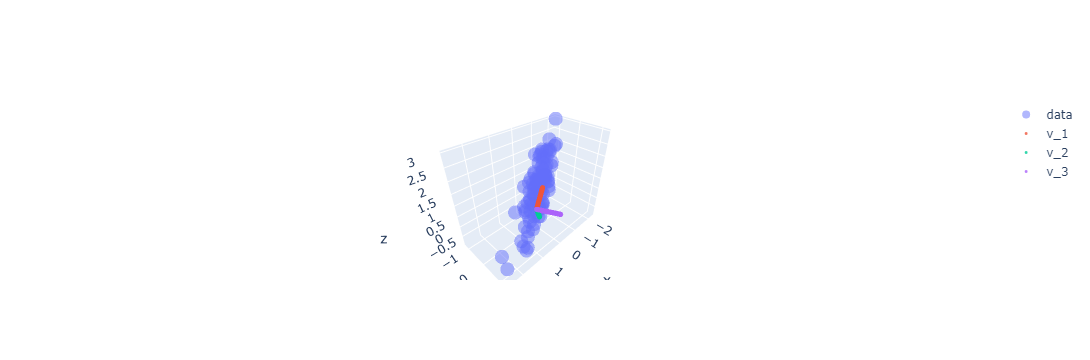

In [10]:
lambdas, vs = sorted_eig(cov)  # Compute e'vals and e'vectors of cov matrix 
print("lambdas, vs =\n",lambdas,"\n",vs)

# Re-plot our data
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',  
        marker=dict(size=8,opacity=0.5), name="data" ) ])

# Draw some extra 'lines' showing eigenvector directions
n_ev_balls = 50    # the lines will be made of lots of balls in a line
ev_size= 3    # size of balls
t = np.linspace(0,1,num=n_ev_balls)  # parameterizer for drawing along vec directions

for i in range(3):   # do this for each eigenvector 
    # Uncomment the next line to scale (unit) vector by size of the eigenvalue
    # vs[:,i] *= lambdas[i] 
    ex, ey, ez = t*vs[0,i], t*vs[1,i],  t*vs[2,i]
    fig.add_trace(go.Scatter3d(x=ex, y=ey, z=ez,mode='markers',
                marker=dict(size=ev_size,opacity=0.8), name="v_"+str(i+1)))

fig.update_layout( xaxis_title="x", yaxis_title="y", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

# Projecting the Data

In [11]:
lambdas, vs = sorted_eig(cov)  

proj_cov = vs.T @ cov @ vs   # project the covariance matrix, using eigenvectors
proj_cov

array([[ 1.30754934e+00,  8.64365477e-17, -2.52356787e-16],
       [ 1.26041604e-16,  2.98939092e-01,  3.04262169e-17],
       [-1.16547583e-16,  6.76547480e-17,  3.17138258e-02]])

In [12]:
proj_cov[np.abs(proj_cov) < 1e-15] = 0
proj_cov

array([[1.30754934, 0.        , 0.        ],
       [0.        , 0.29893909, 0.        ],
       [0.        , 0.        , 0.03171383]])

In [13]:
data = np.stack((x,y,z),axis=1)
data.shape   # we had a 100 data points, so expecting 100x3 matrix 

(100, 3)

In [14]:
print("\n 1. All data, rotated into new coordinate system")
W = vs[:,0:3]  # keep the all the eigenvectors
new_data_all = data @ W  # project all the data 
print("Checking: new_data_all.shape =",new_data_all.shape)
print("New covariance matrix = \n",np.cov(new_data_all.T) )


print("\n 2. Truncated data projected onto principal axes of coordinate system")

W = vs[:,0:2]  # keep only the first and 2nd eigenvectors 
print("W.shape = ",W.shape) 
new_data_proj = data @ W   # project 
print("Checking: new_data_proj.shape =",new_data_proj.shape)
print("New covariance matrix in projected space = \n",np.cov(new_data_proj.T) )

# Difference between them
diff = new_data_all[:,0:2] - new_data_proj
print("\n Absolute maximum difference between the two methods = ",np.max(np.abs(diff)))


 1. All data, rotated into new coordinate system
Checking: new_data_all.shape = (100, 3)
New covariance matrix = 
 [[ 1.30754934e+00  3.27093389e-17 -1.14166976e-17]
 [ 3.27093389e-17  2.98939092e-01  2.25270861e-16]
 [-1.14166976e-17  2.25270861e-16  3.17138258e-02]]

 2. Truncated data projected onto principal axes of coordinate system
W.shape =  (3, 2)
Checking: new_data_proj.shape = (100, 2)
New covariance matrix in projected space = 
 [[1.30754934e+00 3.27093389e-17]
 [3.27093389e-17 2.98939092e-01]]

 Absolute maximum difference between the two methods =  0.0


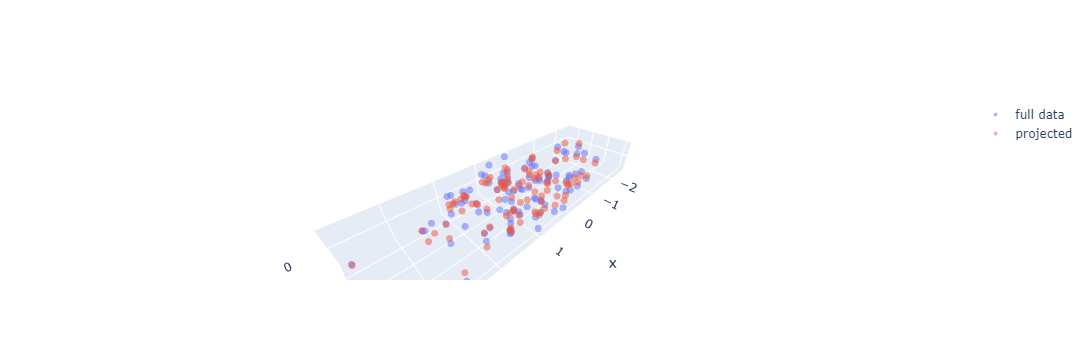

In [15]:
fig = go.Figure(data=[(go.Scatter3d(x=new_data_all[:,0], y=new_data_all[:,1], z=new_data_all[:,2],
        mode='markers', marker=dict(size=4,opacity=0.5), name="full data" ))])
fig.add_trace(go.Scatter3d(x=new_data_proj[:,0], y=new_data_proj[:,1], z=new_data_proj[:,0]*0,
        mode='markers', marker=dict(size=4,opacity=0.5), name="projected" ) )
fig.update_layout(scene_aspectmode='data')
fig.show()

# Example: Handwritten Digits

(1797, 64) (1797,) 

This is supposed to be a '0':


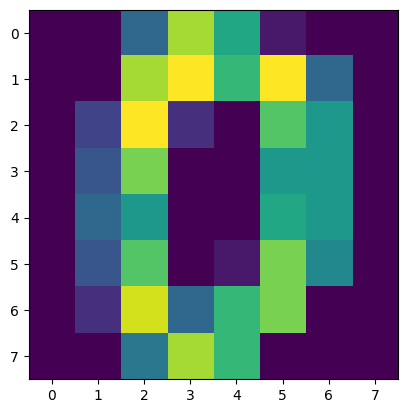

This is supposed to be a '1':


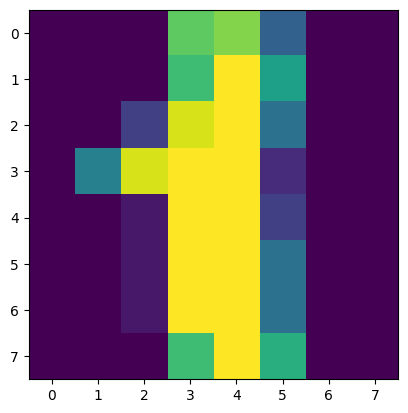

This is supposed to be a '2':


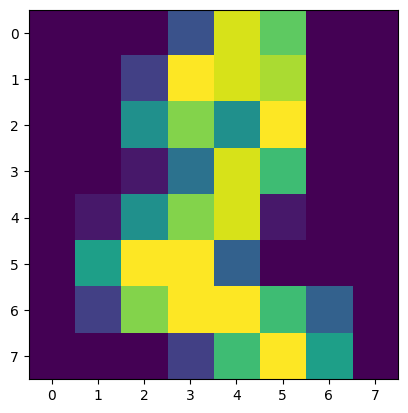

This is supposed to be a '3':


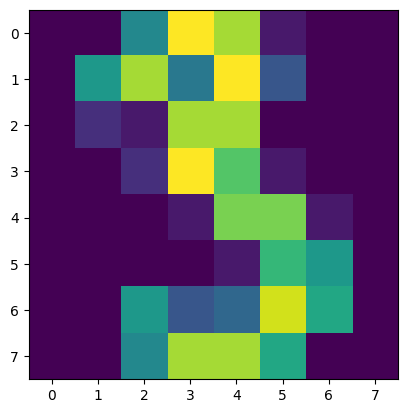

This is supposed to be a '4':


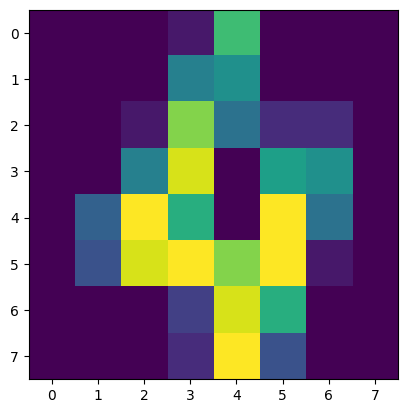

This is supposed to be a '5':


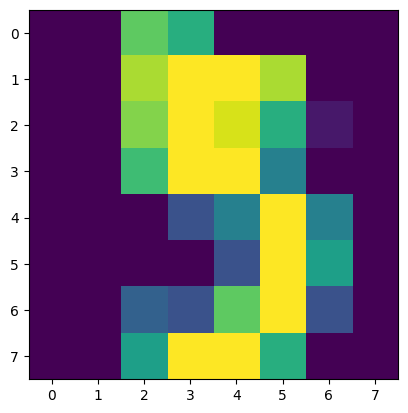

This is supposed to be a '6':


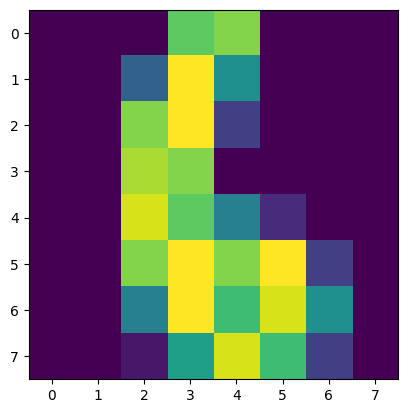

This is supposed to be a '7':


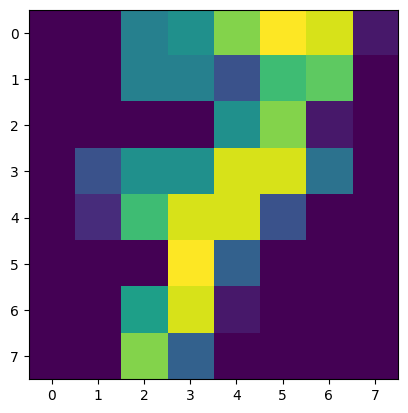

In [16]:
from sklearn.datasets import load_digits 
from sklearn.decomposition import PCA
digits  = load_digits()
X = digits.data / 255.0 
Y = digits.target
print(X.shape, Y.shape,'\n')

# Let's look a a few examples
for i in range(8):  # show 8 examples 
    print("This is supposed to be a '",Y[i],"':",sep="")
    plt.imshow(X[i].reshape([8,8]))
    plt.show()

digits_cov.shape =  (64, 64)
proj_digits.shape =  (1797, 2)


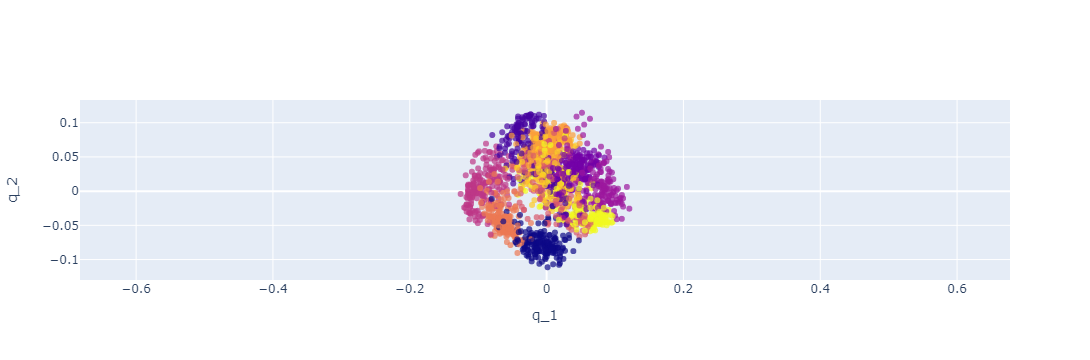

In [17]:
digits_cov = np.cov(X.T)
print("digits_cov.shape = ",digits_cov.shape)
lambdas, vs = sorted_eig(np.array(digits_cov)) 

W = vs[:,0:2]  # just keep two dimensions
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

# Make the plot 
fig = go.Figure(data=[go.Scatter(x=proj_digits[:,0], y=proj_digits[:,1],# z=Y, #z=proj_digits[:,2],
                mode='markers', marker=dict(size=6, opacity=0.7, color=Y), text=['digit='+str(j) for j in Y] )])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()

proj_digits.shape =  (1797, 3)


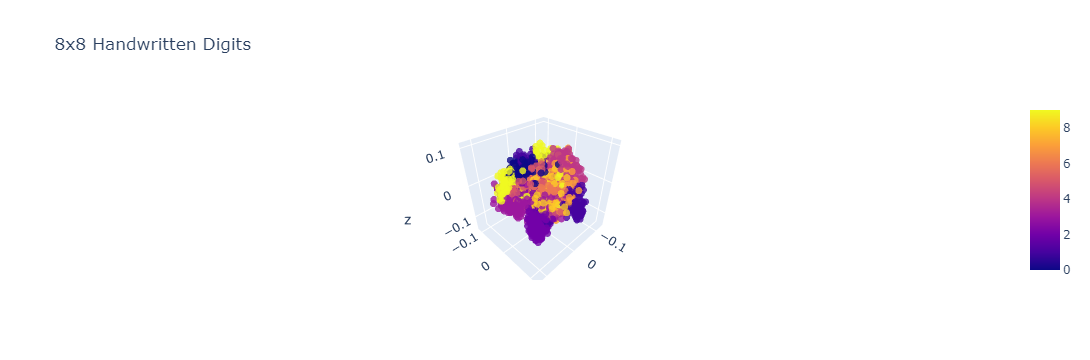

In [18]:
W = vs[:,0:3]  # just three dimensions
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

# Make the plot, separate them by "z" which is the digit of interest.  
fig = go.Figure(data=[go.Scatter3d(x=proj_digits[:,0], y=proj_digits[:,1], z=proj_digits[:,2],
                mode='markers', marker=dict(size=4, opacity=0.8, color=Y, showscale=True), 
                text=['digit='+str(j) for j in Y] )])
fig.update_layout(title="8x8 Handwritten Digits", xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.show()

# Graphing Variance vs. Components

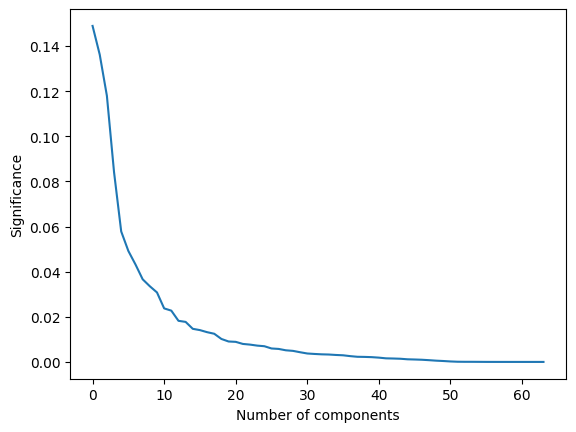

In [19]:
plt.plot( np.abs(lambdas)/np.sum(lambdas) )
plt.xlabel('Number of components')
plt.ylabel('Significance') 
plt.show()